In [1]:
import numpy as np
from numpy import *
from scipy.stats import norm
import scipy.stats as si
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

In [3]:
# Complete the following functions
def BS_european_price(S0, K, T, r, sigma):
  # --------- Insert your code here --------- #
    d1 = (np.log(S0/K) +(r + 0.5 * sigma**2) * T) / (sigma *np.sqrt(T))
    d2 = (np.log(S0/K) +(r - 0.5 * sigma**2) * T) / (sigma *np.sqrt(T))
    
    c = (S0 * si.norm.cdf(d1, 0.0, 1.0) -K * np.exp(-r *T) * si.norm.cdf (d2, 0.0, 1.0))       #call
    p = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S0 * si.norm.cdf(-d1, 0.0, 1.0))    #put 
    return c, p

In [4]:
def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))    # array to store simulated paths
    dT = T/numSteps
    paths[0] = [S0] * numPaths
    
    #Monte Carlo simulation of stock prices
    for p_i in range(numPaths):
        for s_i in range(numSteps):
            paths[s_i+1, p_i] = paths[s_i, p_i] * np.exp((mu - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) 
                                                         * np.random.normal(0,1))
    #calculate call and put option prices 
    c_payoffT = np.maximum(paths[numSteps, :] - K, 0)
    p_payoffT = np.maximum(K - paths[numSteps, :], 0)
    c = np.exp(-r * T) * np.mean(c_payoffT)
    p = np.exp(-r * T) * np.mean(p_payoffT)
    return c, p, paths 

In [5]:
def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
  # --------- Insert your code here --------- #
    paths = np.zeros((numSteps + 1, numPaths))    # array to store simulated paths
    dT = T/numSteps                               # time increments
    paths[0] = [S0] * numPaths                     # initial price of each path
    
    #Monte Carlo simulation of stock prices
    for p_i in range(numPaths):
        for s_i in range(numSteps):
            paths[s_i+1, p_i] = paths[s_i, p_i] * np.exp((mu - 0.5 * sigma**2) * dT + sigma * np.sqrt(dT) 
                                                         * np.random.normal(0,1))
    barrier_option = np.zeros(numPaths)
    
    for i in range(numPaths):
        idx = np.array(np.where(paths[:, i] > Sb ))         #find the index where stock prices is greater than the barrier
        if idx.size:                                        #if not empty, barrier price hit  
            barrier_option[i] = 1
        else: 
            barrier_option[i] = 0
            
    #calculate call and put option price, barrier not hit, option worth 0 
    c_payoffT = barrier_option * (np.maximum(paths[numSteps, :] -K, 0))
    p_payoffT = barrier_option * np.maximum(K - paths[numSteps, :], 0)
    c = np.exp(-r * T) * np.mean(c_payoffT)
    p = np.exp(-r * T) * np.mean(p_payoffT)
    return c, p 

In [6]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

np.random.seed()
numSteps = 12;        #12 months to maturity 
numPaths = 1000000;

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = \
BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1 = \
MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step, paths_multi = \
MC_european_price (S0, K, T, r, mu, sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)

## Compute prices of Barrier options with volatility increased and decreased by 10% from the original inputs.

# Implement your one-step Monte Carlo pricing procedure for Barrier option w/ +10% volatility
callMC_Barrier_Knockin_Price_1_step_i, putMC_Barrier_Knockin_Price_1_step_i = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, 1.1*sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option w/ +10% volatility
callMC_Barrier_Knockin_Price_multi_step_i, putMC_Barrier_Knockin_Price_multi_step_i = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, 1.1*sigma, numSteps, numPaths)

# Implement your one-step Monte Carlo pricing procedure for Barrier option w/ -10% volatility
callMC_Barrier_Knockin_Price_1_step_d, putMC_Barrier_Knockin_Price_1_step_d = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, 0.9*sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for Barrier option w/ -10% volatility
callMC_Barrier_Knockin_Price_multi_step_d, putMC_Barrier_Knockin_Price_multi_step_d = \
MC_barrier_knockin_price (S0, Sb, K, T, r, mu, 0.9*sigma, numSteps, numPaths)


In [7]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step), '\n') 

print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step), '\n') 

print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step), '\n') 

print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step), '\n')


Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

One-step MC price of an European call option is 8.011202446389978
One-step MC price of an European put option is 7.90852037203274 

Multi-step MC price of an European call option is 8.022019838500855
Multi-step MC price of an European put option is 7.903487060061184 

One-step MC price of an Barrier call option is 7.807368030859526
One-step MC price of an Barrier put option is 0.0 

Multi-step MC price of an Barrier call option is 7.950171460146708
Multi-step MC price of an Barrier put option is 1.2740136174115408 



### Barrier Option with volatility increase/decrease by 10%

In [27]:
print('One-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_i)) 
print('One-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_i), '\n') 

print('Multi-step MC price of an Barrier call option with volatility increased by 10% is ' + str(callMC_Barrier_Knockin_Price_multi_step_i)) 
print('Multi-step MC price of an Barrier put option with volatility increased by 10% is ' + str(putMC_Barrier_Knockin_Price_multi_step_i),'\n')


print('One-step MC price of an Barrier call option with volatility decreased by 10% is ' + str(callMC_Barrier_Knockin_Price_1_step_d)) 
print('One-step MC price of an Barrier put option with volatility decreased by 10% is ' + str(putMC_Barrier_Knockin_Price_1_step_d),'\n') 

print('Multi-step MC price of an Barrier call option with volatility decreased by 10% ' + str(callMC_Barrier_Knockin_Price_multi_step_d)) 
print('Multi-step MC price of an Barrier put option with volatility decreased by 10% ' + str(putMC_Barrier_Knockin_Price_multi_step_d),'\n')

One-step MC price of an Barrier call option with volatility increased by 10% is 8.59863150710071
One-step MC price of an Barrier put option with volatility increased by 10% is 0.0 

Multi-step MC price of an Barrier call option with volatility increased by 10% is 8.776179825614784
Multi-step MC price of an Barrier put option with volatility increased by 10% is 1.592178412900364 

One-step MC price of an Barrier call option with volatility decreased by 10% is 7.000429792297398
One-step MC price of an Barrier put option with volatility decreased by 10% is 0.0 

Multi-step MC price of an Barrier call option with volatility decreased by 10% 7.1472092297355205
Multi-step MC price of an Barrier put option with volatility decreased by 10% 0.9725423354790903 



Time required to run:  487.5519104003906 s


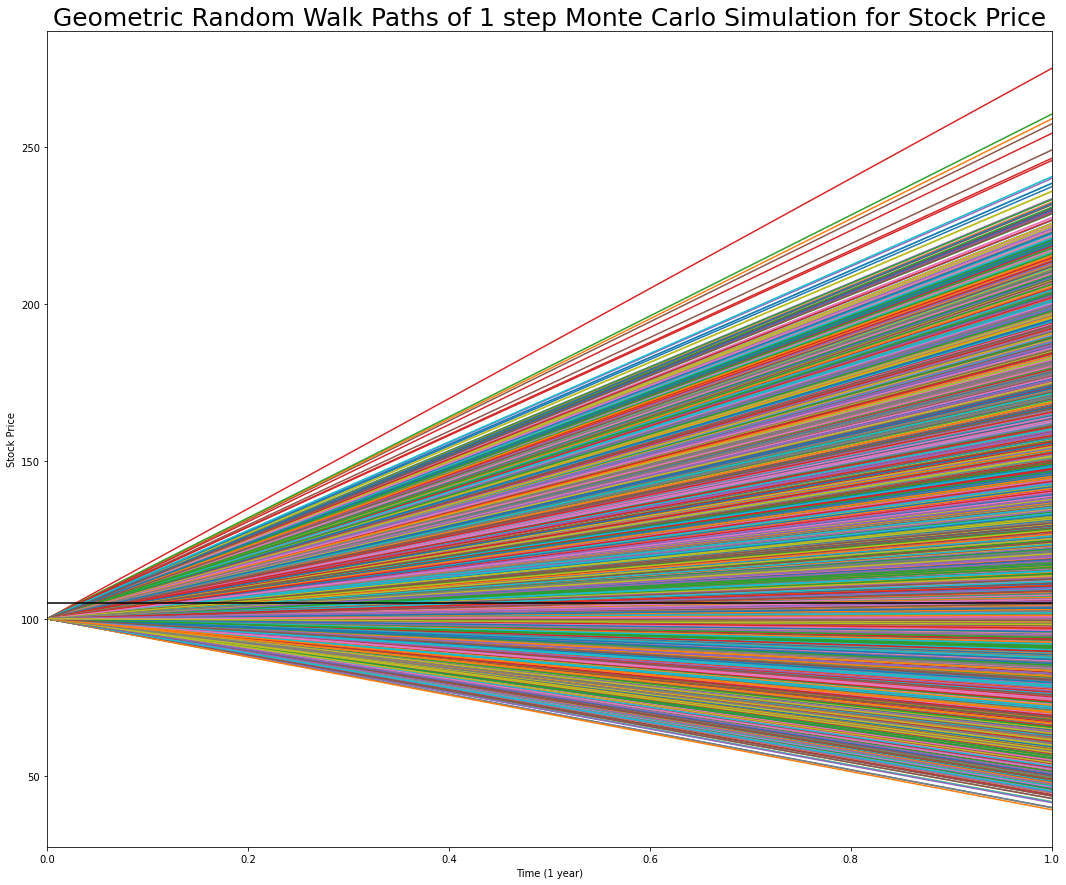

In [17]:
# Plot results
# --------- Insert your code here --------- #
import time
start =  time.time()
# 1) one step MC 
plt.figure(figsize = (18, 15))
plt.plot(paths_1[: ,0:-1])
plt.axhline(K, c="k", xmin=0, xmax=1, label="Strike Price")
plt.xlim([0, 1])
plt.xlabel('Time (1 year)')
plt.ylabel('Stock Price')
plt.title('Geometric Random Walk Paths of 1 step Monte Carlo Simulation for Stock Price', fontsize = 25)
end = time.time()
print('Time required to run: ', end - start, 's')

Time required to run:  447.0707948207855 s


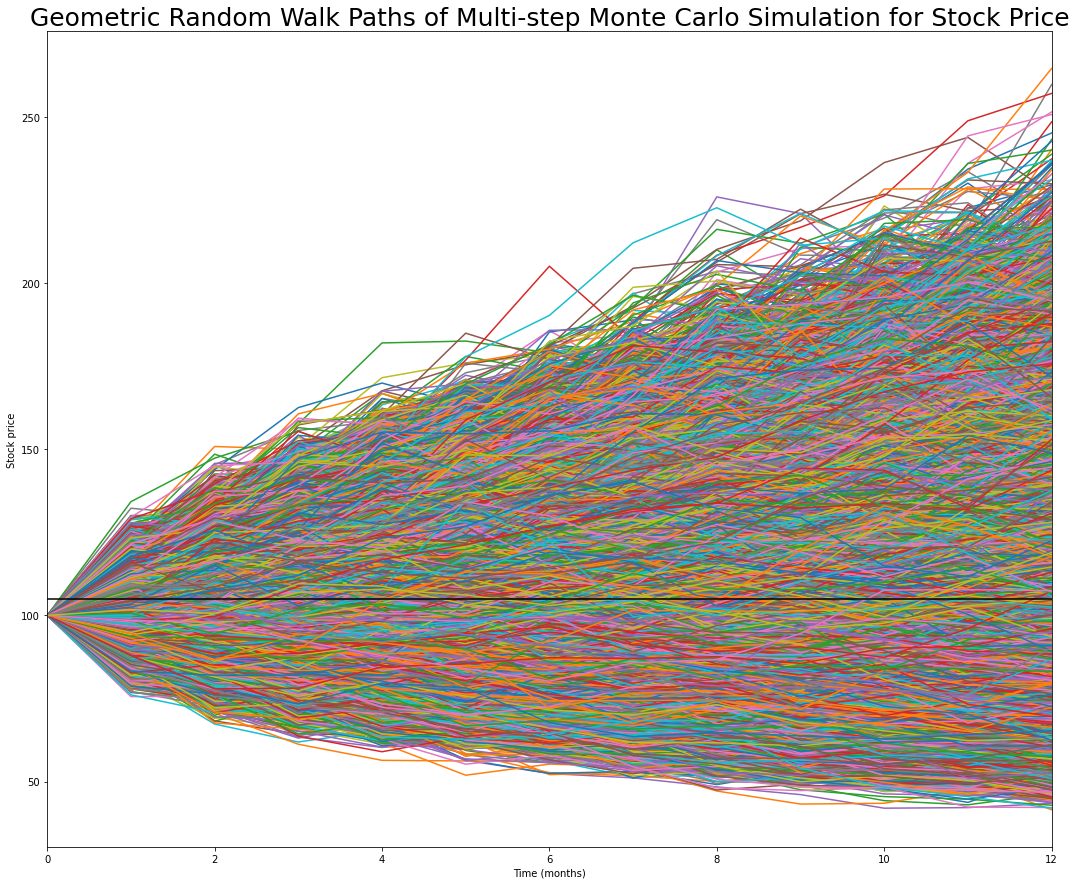

In [18]:
# 2) multi-step step MC 
start =  time.time()
plt.figure(figsize = (18, 15))
plt.plot(paths_multi[:,0:-1])
plt.axhline(K, c="k", xmin=0,xmax=numSteps, label="Strike Price")
plt.xlim([0, numSteps])
plt.xlabel("Time (months)")
plt.ylabel("Stock price")
plt.title('Geometric Random Walk Paths of Multi-step Monte Carlo Simulation for Stock Price', fontsize = 25)
end = time.time()
print('Time required to run: ', end - start, 's')

### Optimal Number of Steps and Scenarios 

In [29]:
#number of time step =1 
#1. European options are path-independent thus number of time steps does not affect the estimation 
#2. 1 step requires less computation time 

num_steps_opt = 1

#Gridsearch
num_path_list = np.array([100, 1000,10000, 100000, 1000000, 10000000])

# initial residual 
re_call_opt = call_BS_European_Price
re_put_opt = putBS_European_Price

for num_Path in num_path_list:
    callMC_European_Price_1_step, putMC_European_Price_1_step, paths_1 = \
    MC_european_price(S0, K, T, r, mu, sigma, 1, num_Path)
    
    residual_call = abs(call_BS_European_Price - callMC_European_Price_1_step)
    residual_put = abs(putBS_European_Price - putMC_European_Price_1_step)
    
    #check residual
    if residual_call < re_call_opt:
        re_call_opt = residual_call
        num_path_call_opt = num_Path
        call_opt = callMC_European_Price_1_step
    
    
    if residual_put < re_put_opt:
        re_put_opt = residual_put
        num_path_put_opt = num_Path
        put_opt = putMC_European_Price_1_step
        


In [30]:
print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price), '\n')

print('The optimal number of paths for call option is {} and the optimal estimation of call option price is {:.4f}'.format(num_path_call_opt,call_opt))
print('The absolute residual between Black-Scholes and the estimation is: %.4f'%(re_call_opt))

print('The optimal number of paths for put option is {} and the optimal estimation of call option price is {:.4f}'.format(num_path_put_opt,put_opt))
print('The absolute residual between Black-Scholes and the estimation is: %.4f'%(re_put_opt))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455 

The optimal number of paths for call option is 1000000 and the optimal estimation of call option price is 8.0201
The absolute residual between Black-Scholes and the estimation is: 0.0012
The optimal number of paths for put option is 10000000 and the optimal estimation of call option price is 7.9055
The absolute residual between Black-Scholes and the estimation is: 0.0051
